   TEST Match No  Match ID                           Match Name  Series ID  \
0           2378   1183534    Australia Vs New Zealand 3Rd Test    1195334   
1           2383   1212542       Zimbabwe Vs Sri Lanka 2Nd Test    1212540   
2           2384   1213062      Pakistan Vs Bangladesh 1St Test    1195334   
3            650     63035         Pakistan Vs England 3Rd Test      60425   
4            651     63037  New Zealand Vs West Indies 2Nd Test      60426   

                                         Series Name Match Start Date  \
0    ICC World Test Championship  - 2019 (2019-2021)       2020-01-03   
1            Sri Lanka in Zimbabwe  - 2020 (2019/20)       2020-01-27   
2           Bangladesh in Pakistan  - 2020 (2019/20)       2020-02-07   
3         England tour of Pakistan  - 1969 (1968/69)       1969-03-06   
4  West Indies tour of New Zealand  - 1969 (1968/69)       1969-03-07   

  Match End Date Match Format  Team1 ID   Team1 Name  ...        Umpire 2  \
0     2020-01-0

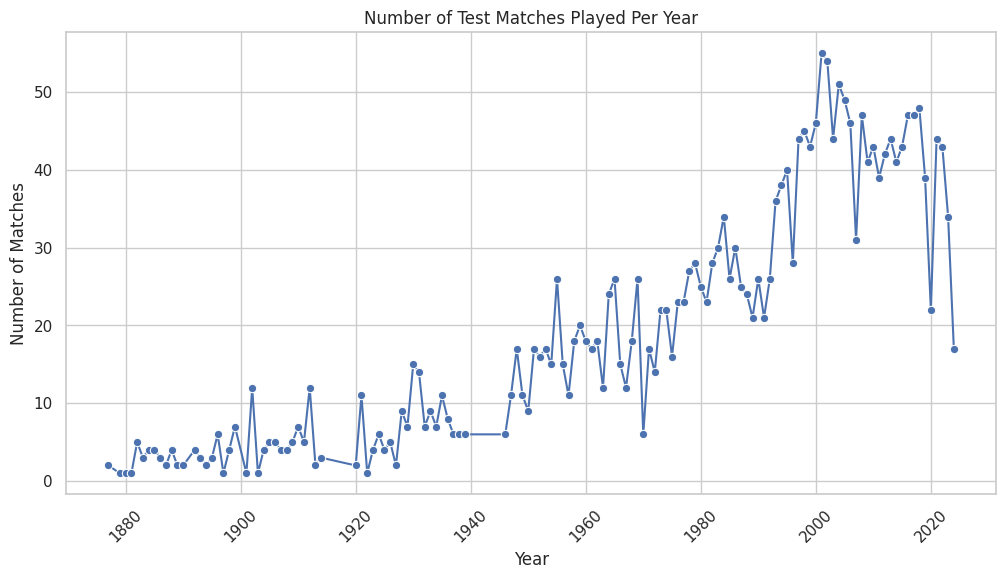

<ipython-input-3-aec5b553ff83>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_teams.index, x=top_teams.values, palette="viridis")


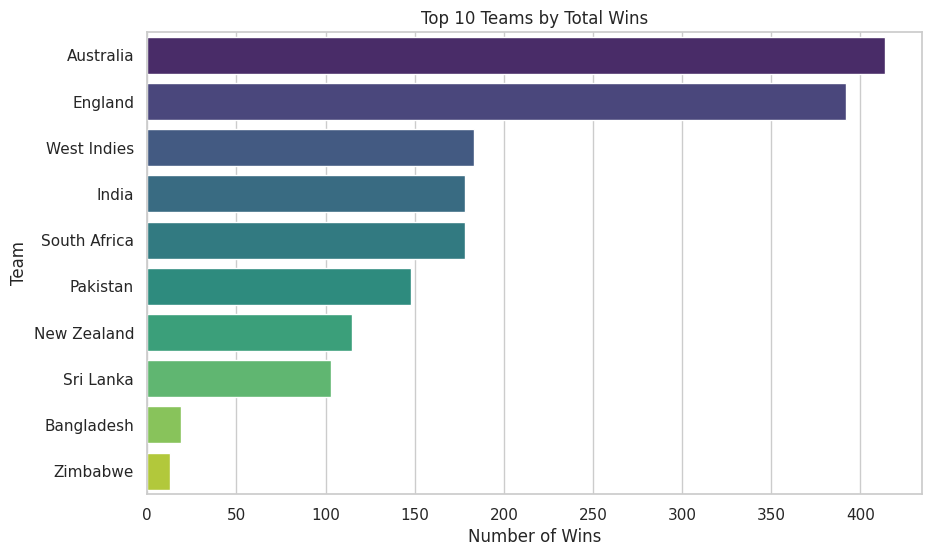

<ipython-input-3-aec5b553ff83>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Toss Winner Choice", palette="coolwarm",


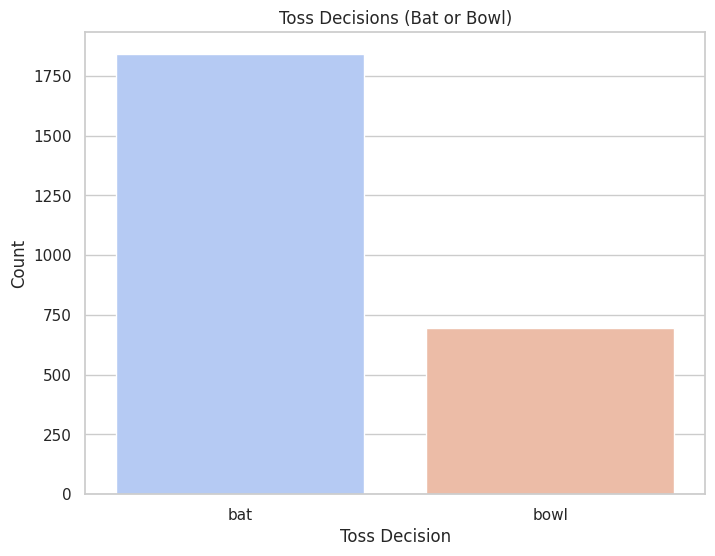

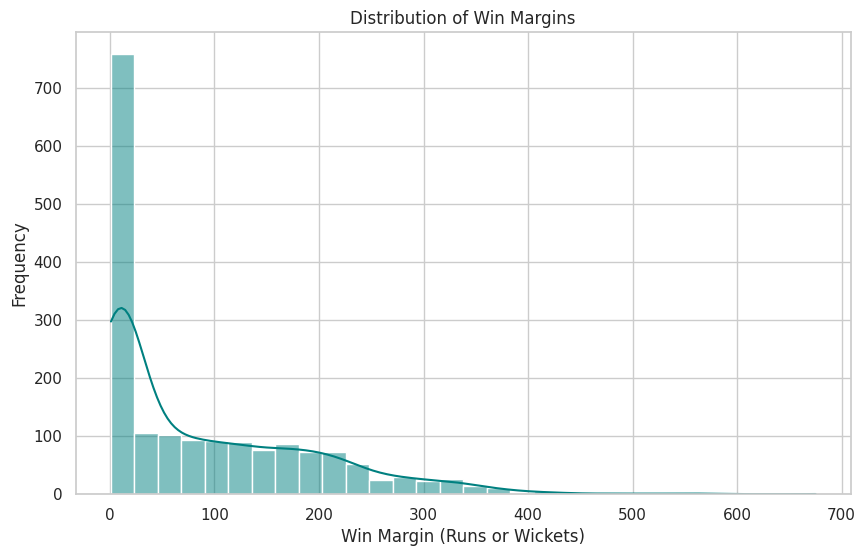

<ipython-input-3-aec5b553ff83>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_venues.index, x=top_venues.values, palette="cubehelix")


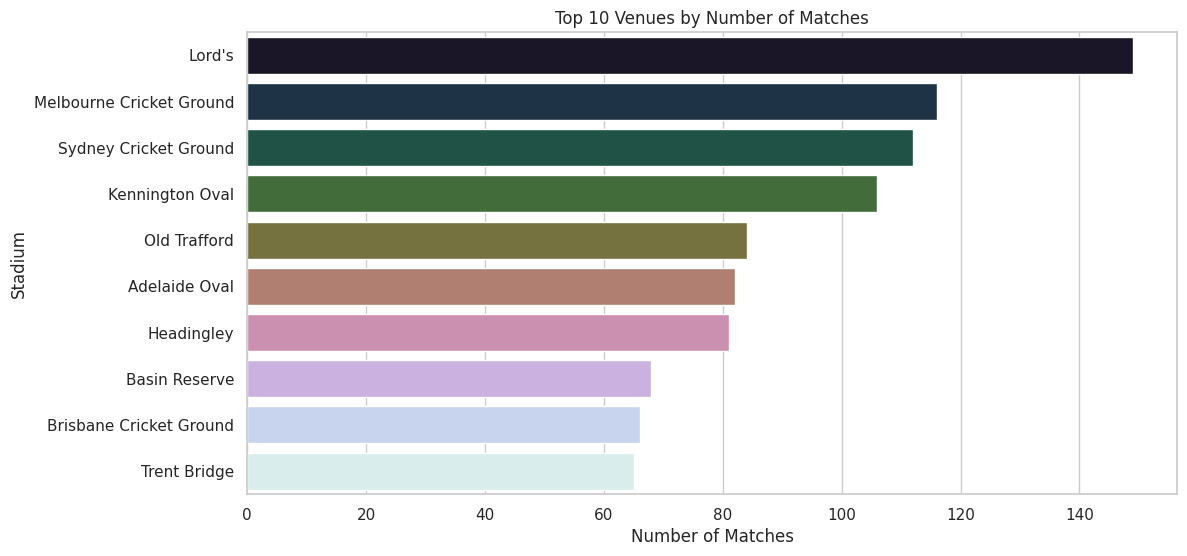

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

<Figure size 1400x700 with 0 Axes>

In [3]:
# Step 1: Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
file_path = "test_Matches_Data.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Step 3: Data Inspection and Preprocessing
# Display the first few rows to understand the structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Convert 'Match Start Date' to datetime
df['Match Start Date'] = pd.to_datetime(df['Match Start Date'])

# Extract year from 'Match Start Date'
df['Year'] = df['Match Start Date'].dt.year

# Step 4: Data Visualization
sns.set(style="whitegrid")  # Set aesthetic style for plots

# 1. Matches Played Per Year
plt.figure(figsize=(12, 6))
matches_per_year = df['Year'].value_counts().sort_index()
sns.lineplot(x=matches_per_year.index, y=matches_per_year.values, marker='o')
plt.title("Number of Test Matches Played Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.show()

# 2. Top 10 Teams by Total Wins
plt.figure(figsize=(10, 6))
top_teams = df['Match Winner'].value_counts().head(10).dropna()
sns.barplot(y=top_teams.index, x=top_teams.values, palette="viridis")
plt.title("Top 10 Teams by Total Wins")
plt.xlabel("Number of Wins")
plt.ylabel("Team")
plt.show()

# 3. Toss Decisions Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Toss Winner Choice", palette="coolwarm",
              order=df["Toss Winner Choice"].value_counts().index)
plt.title("Toss Decisions (Bat or Bowl)")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.show()

# 4. Distribution of Win Margins
plt.figure(figsize=(10, 6))
df['Win Margin'] = pd.to_numeric(df['Match Result Text'].str.extract(r'(\d+)')[0], errors='coerce')
sns.histplot(df['Win Margin'], bins=30, kde=True, color="teal")
plt.title("Distribution of Win Margins")
plt.xlabel("Win Margin (Runs or Wickets)")
plt.ylabel("Frequency")
plt.show()

# 5. Matches by Venue (Top 10 Stadiums)
plt.figure(figsize=(12, 6))
top_venues = df['Match Venue (Stadium)'].value_counts().head(10)
sns.barplot(y=top_venues.index, x=top_venues.values, palette="cubehelix")
plt.title("Top 10 Venues by Number of Matches")
plt.xlabel("Number of Matches")
plt.ylabel("Stadium")
plt.show()

# 6. Matches Played by Year in Different Cities
plt.figure(figsize=(14, 7))
city_year = df.groupby(['Year', 'Match Venue (City)']).size().reset_index(name='Matches')
pivot_city_year = city_year.pivot("Year", "Match Venue (City)", "Matches")
sns.heatmap(pivot_city_year, cmap="YlGnBu", cbar_kws={'label': 'Number of Matches'})
plt.title("Matches Played by Year in Different Cities")
plt.xlabel("City")
plt.ylabel("Year")
plt.show()


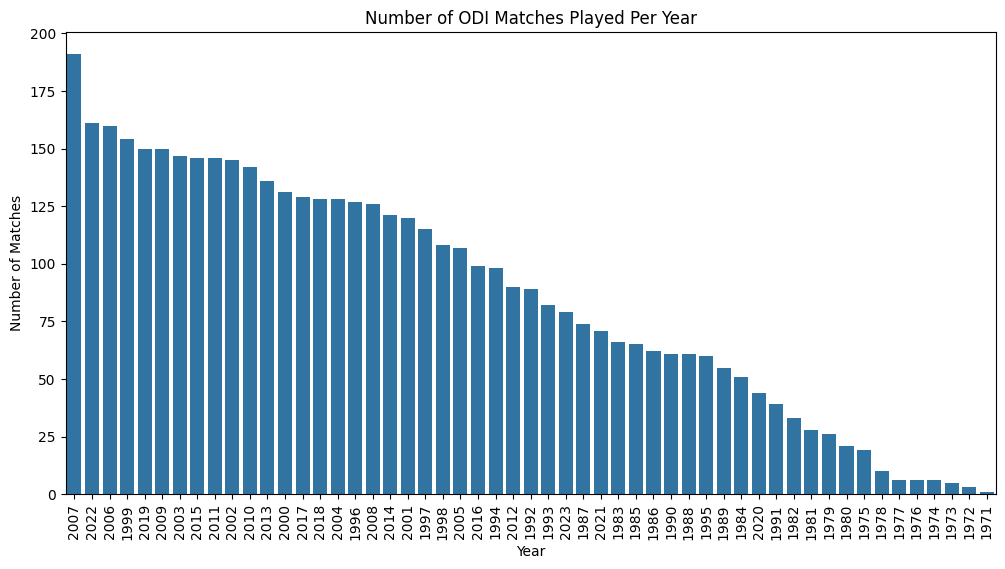

<ipython-input-6-2bb13e228778>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stadium_counts.values, y=stadium_counts.index, palette='viridis')


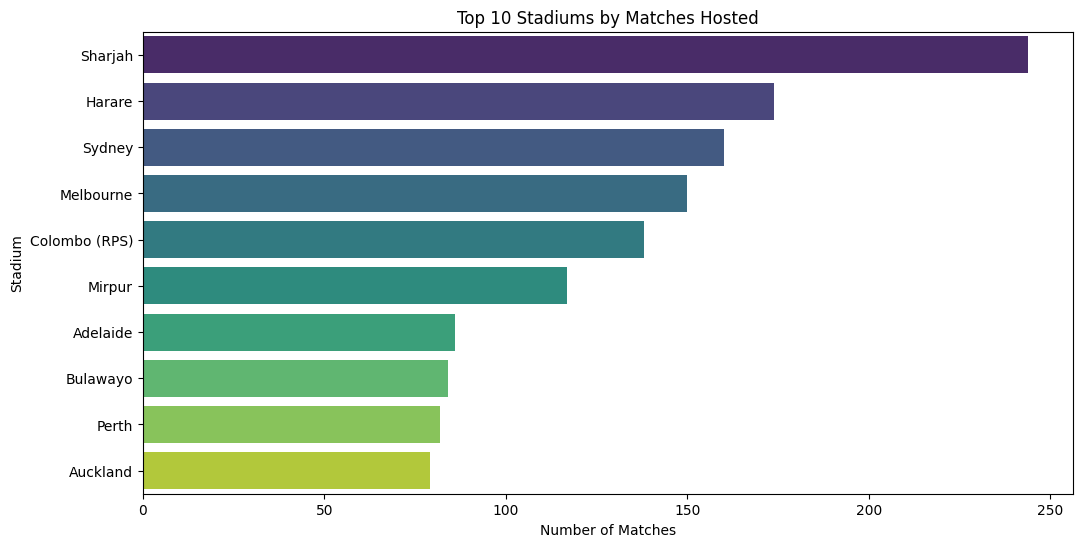

<ipython-input-6-2bb13e228778>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winning_counts.values, y=winning_counts.index, palette='magma')


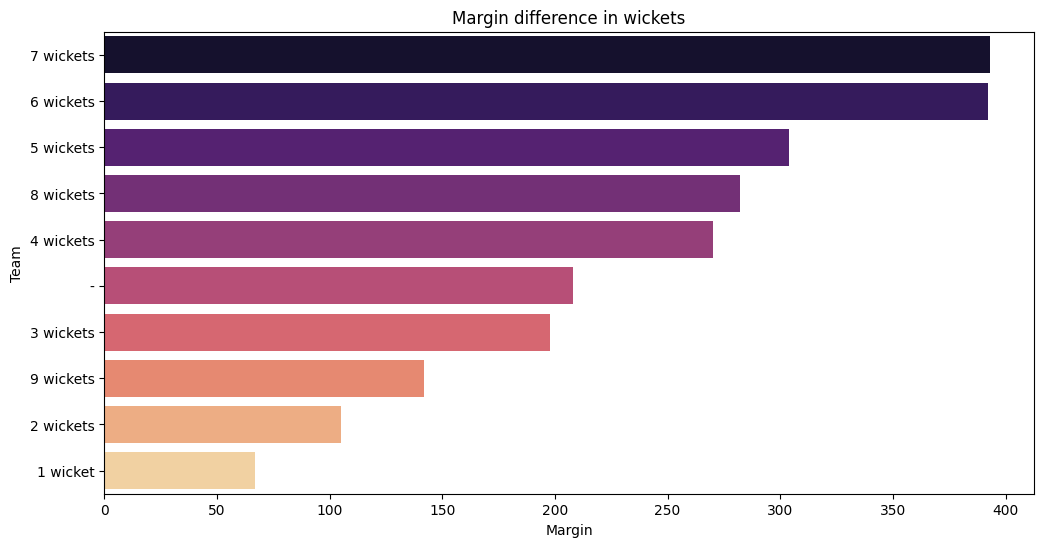

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'file_path' with your file location)
df = pd.read_csv('ODI.csv')

# Function to handle inconsistent date formats
def parse_date(date_str):
    try:
        # Handle cases like 'Jul 15-16, 1974' by extracting the first part
        if '-' in date_str:
            date_str = date_str.split('-')[0] + date_str[-6:]  # Keep the first date and year
        return pd.to_datetime(date_str, format='%b %d, %Y', errors='coerce')  # Convert to datetime
    except Exception as e:
        return pd.NaT  # Return NaT for invalid dates

# Apply the function to 'Match Date'
df['Match Date'] = df['Match Date'].apply(parse_date)

# Drop rows with invalid dates
df = df.dropna(subset=['Match Date'])

# Extract year from 'Match Date' for visualizations
df['Year'] = df['Match Date'].dt.year

# Visualization 1: Number of matches played per year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year', order=df['Year'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of ODI Matches Played Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()

# Visualization 2: Top 10 stadiums by matches hosted
plt.figure(figsize=(12, 6))
stadium_counts = df['Ground'].value_counts().head(10)
sns.barplot(x=stadium_counts.values, y=stadium_counts.index, palette='viridis')
plt.title('Top 10 Stadiums by Matches Hosted')
plt.xlabel('Number of Matches')
plt.ylabel('Stadium')
plt.show()


# Visualization 4: Top 10 teams with the most wins
plt.figure(figsize=(12, 6))
winning_counts = df['Margin'].value_counts().head(10)
sns.barplot(x=winning_counts.values, y=winning_counts.index, palette='magma')
plt.title('Margin difference in wickets')
plt.xlabel('Margin')
plt.ylabel('Team')
plt.show()


In [3]:
df.head()

,Unnamed: 0,Team_1,Team_2,Winner,Margin,Ground,Match Date,Year
0,0,Australia,England,Australia,5 wickets,Melbourne,1971-01-05,1971
1,1,England,Australia,England,6 wickets,Manchester,1972-08-24,1972
2,2,England,Australia,Australia,5 wickets,Lord's,1972-08-26,1972
3,3,England,Australia,England,2 wickets,Birmingham,1972-08-28,1972
4,4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,1973-02-11,1973
